In [25]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv(
    'fifa_players.csv',
    low_memory=False
)
print(f"Датасет завантажено: {df.shape[0]} рядків, {df.shape[1]} колонок")
print(f"\nПерші 5 рядків:")
df.head()

Датасет завантажено: 19239 рядків, 80 колонок

Перші 5 рядків:


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,player_face_url,club_logo_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,6,11,15,14,8,NaN,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,15,6,12,8,10,NaN,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,7,11,15,14,11,NaN,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,9,9,15,15,11,NaN,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,15,13,5,10,13,NaN,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sofifa_id                    19239 non-null  int64  
 1   player_url                   19239 non-null  object 
 2   short_name                   19239 non-null  object 
 3   long_name                    19239 non-null  object 
 4   player_positions             19239 non-null  object 
 5   overall                      19239 non-null  int64  
 6   potential                    19239 non-null  int64  
 7   value_eur                    19165 non-null  float64
 8   wage_eur                     19178 non-null  float64
 9   age                          19239 non-null  int64  
 10  dob                          19239 non-null  object 
 11  height_cm                    19239 non-null  int64  
 12  weight_kg                    19239 non-null  int64  
 13  club_position   

In [28]:
# Топ 100 гравців з найвищим рейтингом:

top_players = df.sort_values(by='overall', ascending=False).head(100)
top_players = top_players[[
    'sofifa_id',
    'short_name',
    'overall',
    'value_eur', 
    'wage_eur', 
    'age',
    'club_name',
    'league_name',
    'nationality_name'
]]

pd.set_option('display.max_rows', 100)
top_players

,sofifa_id,short_name,overall,value_eur,wage_eur,age,club_name,league_name,nationality_name
0,158023,L. Messi,93,78000000.0,320000.0,34,Paris Saint-Germain,French Ligue 1,Argentina
1,188545,R. Lewandowski,92,119500000.0,270000.0,32,FC Bayern München,German 1. Bundesliga,Poland
2,20801,Cristiano Ronaldo,91,45000000.0,270000.0,36,Manchester United,English Premier League,Portugal
3,190871,Neymar Jr,91,129000000.0,270000.0,29,Paris Saint-Germain,French Ligue 1,Brazil
4,192985,K. De Bruyne,91,125500000.0,350000.0,30,Manchester City,English Premier League,Belgium
5,200389,J. Oblak,91,112000000.0,130000.0,28,Atlético de Madrid,Spain Primera Division,Slovenia
6,231747,K. Mbappé,91,194000000.0,230000.0,22,Paris Saint-Germain,French Ligue 1,France
7,167495,M. Neuer,90,13500000.0,86000.0,35,FC Bayern München,German 1. Bundesliga,Germany
8,192448,M. ter Stegen,90,99000000.0,250000.0,29,FC Barcelona,Spain Primera Division,Germany
9,202126,H. Kane,90,129500000.0,240000.0,27,Tottenham Hotspur,English Premier League,England


In [29]:
# Топ 100 гравців з найвищими зарплатами. Порівняти з п.1 чи відповідають гравці з найвищими рейтингами найвищим зарплатам і навпаки.

top_salary = df.sort_values(by='wage_eur', ascending=False).head(100)
top_salary = top_salary[[
    'sofifa_id',
    'short_name',
    'overall',
    'value_eur', 
    'wage_eur', 
    'age',
    'club_name',
    'league_name',
    'nationality_name'
]]
top_salary

,sofifa_id,short_name,overall,value_eur,wage_eur,age,club_name,league_name,nationality_name
4,192985,K. De Bruyne,91,125500000.0,350000.0,30,Manchester City,English Premier League,Belgium
11,165153,K. Benzema,89,66000000.0,350000.0,33,Real Madrid CF,Spain Primera Division,France
0,158023,L. Messi,93,78000000.0,320000.0,34,Paris Saint-Germain,French Ligue 1,Argentina
14,200145,Casemiro,89,88000000.0,310000.0,29,Real Madrid CF,Spain Primera Division,Brazil
24,182521,T. Kroos,88,75000000.0,310000.0,31,Real Madrid CF,Spain Primera Division,Germany
27,202652,R. Sterling,88,107500000.0,290000.0,26,Manchester City,English Premier League,England
2,20801,Cristiano Ronaldo,91,45000000.0,270000.0,36,Manchester United,English Premier League,Portugal
3,190871,Neymar Jr,91,129000000.0,270000.0,29,Paris Saint-Germain,French Ligue 1,Brazil
1,188545,R. Lewandowski,92,119500000.0,270000.0,32,FC Bayern München,German 1. Bundesliga,Poland
17,209331,M. Salah,89,101000000.0,270000.0,29,Liverpool,English Premier League,Egypt


Можемо побачити, що топ зарплат не відповідає точно топу за рейтингом - перші в топі зарплат K. De Bruyne та K. Benzema, які за рейтингом 5 і 19 відповідно.

In [30]:
# Топ 30 воротарів з найвищим рейтингом. 

top_goalkeepers = df[df['player_positions'] == 'GK'].sort_values(by='overall', ascending=False).head(30)
top_goalkeepers = top_goalkeepers[[
    'sofifa_id',
    'short_name',
    'overall',
    'value_eur', 
    'wage_eur', 
    'age',
    'club_name',
    'league_name',
    'nationality_name'
]]

top_goalkeepers

,sofifa_id,short_name,overall,value_eur,wage_eur,age,club_name,league_name,nationality_name
5,200389,J. Oblak,91,112000000.0,130000.0,28,Atlético de Madrid,Spain Primera Division,Slovenia
8,192448,M. ter Stegen,90,99000000.0,250000.0,29,FC Barcelona,Spain Primera Division,Germany
7,167495,M. Neuer,90,13500000.0,86000.0,35,FC Bayern München,German 1. Bundesliga,Germany
12,192119,T. Courtois,89,85500000.0,250000.0,29,Real Madrid CF,Spain Primera Division,Belgium
18,210257,Ederson,89,94000000.0,200000.0,27,Manchester City,English Premier League,Brazil
20,212831,Alisson,89,82000000.0,190000.0,28,Liverpool,English Premier League,Brazil
21,230621,G. Donnarumma,89,119500000.0,110000.0,22,Paris Saint-Germain,French Ligue 1,Italy
26,193041,K. Navas,88,15500000.0,130000.0,34,Paris Saint-Germain,French Ligue 1,Costa Rica
31,167948,H. Lloris,87,13500000.0,125000.0,34,Tottenham Hotspur,English Premier League,France
34,186153,W. Szczęsny,87,42000000.0,105000.0,31,Juventus,Italian Serie A,Poland


In [31]:
# Топ 30 команд з гравцями найвищого рейтингу в середньому.

top_30_clubs_by_overall = df.groupby('club_name')['overall'].mean().sort_values(ascending=False).head(30)
top_30_clubs_by_overall

club_name
Juventus                  79.961538
Paris Saint-Germain       79.454545
Inter                     78.857143
FC Bayern München         78.071429
Manchester United         78.000000
Real Madrid CF            77.757576
Napoli                    77.500000
Atalanta                  77.480000
Real Sociedad             77.280000
SL Benfica                76.931034
Manchester City           76.906250
FC Barcelona              76.787879
Atlético de Madrid        76.718750
AC Milan                  76.714286
Chelsea                   76.363636
FC Porto                  76.153846
Liverpool                 75.969697
Sevilla FC                75.848485
Borussia Dortmund         75.677419
Sporting CP               75.480000
Flamengo                  75.400000
Real Betis Balompié       75.121212
AS Monaco                 75.111111
Leicester City            75.000000
Bayer 04 Leverkusen       74.888889
Villarreal CF             74.878788
Lazio                     74.781250
Clube Atlético Min

In [32]:
# Топ 30 команд в яких в середньому гравці мають найбільшу швидкість.

top_30_clubs_by_speed = df.groupby('club_name')['pace'].mean().sort_values(ascending=False).head(30)
top_30_clubs_by_speed

club_name
FC Red Bull Salzburg         76.640000
New York Red Bulls           76.272727
SK Slavia Praha              75.800000
Paris Saint-Germain          75.724138
Shakhtar Donetsk             75.640000
Juventus                     75.391304
São Paulo                    75.333333
Jeonbuk Hyundai Motors       75.320000
FC Porto                     75.260870
Ajax                         75.250000
Napoli                       74.791667
Feyenoord                    74.652174
Manchester City              74.586207
Racing Club de Lens          74.434783
AC Sparta Praha              74.391304
Real Madrid CF               74.366667
Vélez Sarsfield              74.360000
Olympiacos CFP               74.320000
PSV                          74.240000
KRC Genk                     74.227273
FC Bayern München            74.200000
SL Benfica                   74.192308
OGC Nice                     74.041667
Orlando Pirates              73.880000
FCSB (Steaua)                73.800000
AC Milan       

In [33]:
# Топ усіх Ліг в яких зібрані найкращі дриблери. (dribbling)

top_leagues_by_dribbling = df.groupby('league_name')['dribbling'].mean().sort_values(ascending=False).head(30)
top_leagues_by_dribbling

league_name
Italian Serie A                   69.637624
Spain Primera Division            69.421517
Czech Republic Gambrinus Liga     69.385714
English Premier League            69.125000
German 1. Bundesliga              68.362705
French Ligue 1                    68.067194
Greek Super League                67.549020
Ukrainian Premier League          66.920000
Campeonato Brasileiro Série A     66.555556
Russian Premier League            66.478873
Turkish Süper Lig                 65.933747
Portuguese Liga ZON SAGRES        65.682927
Croatian Prva HNL                 64.857143
Argentina Primera División        64.781874
Holland Eredivisie                64.752941
Hungarian Nemzeti Bajnokság I     64.440000
Belgian Jupiler Pro League        64.277778
Mexican Liga MX                   64.020595
South African Premier Division    63.916667
Spanish Segunda División          63.642729
German 2. Bundesliga              62.795154
USA Major League Soccer           62.594118
English League Champ

In [34]:
# Топ 30 команд з гравцями найвищого рейтингу враховуючи, що команда складається з 11 гравців, 
# серед яких обовʼязково 1 воротар, 4 захисники, 4 півзахисники, 2 нападники. 

defenders = ['CB','LB','RB','LWB','RWB']
midfielders = ['CM','CDM','CAM','LM','RM', 'LW','RW']
forwards = ['ST','CF']

def position_group(positions):
    if pd.isna(positions): return []
    
    positions_list = [pos.strip() for pos in positions.split(',')]
    categories = []
    
    if 'GK' in positions_list: categories.append('GK')
    if any(p in defenders for p in positions_list): categories.append('DEF')
    if any(p in midfielders for p in positions_list): categories.append('MID')
    if any(p in forwards for p in positions_list): categories.append('ATT')
        
    return categories

df['position_groups'] = df['player_positions'].apply(position_group)
df_exploded = df.explode('position_groups')

best_squads = {}
for club_name, club_group in df_exploded.groupby('club_name'):
    
    ratings_dict = {
        'GK': [], 'DEF': [], 'MID': [], 'ATT': []
    }
    
    for position in club_group['position_groups'].unique():
        ratings = club_group[club_group['position_groups'] == position].sort_values(by='overall', ascending=False)['overall']
        ratings_dict[position].extend(ratings.tolist())
        
    gk_ratings = sorted(ratings_dict['GK'], reverse=True)[:1]
    def_ratings = sorted(ratings_dict['DEF'], reverse=True)[:4]
    mid_ratings = sorted(ratings_dict['MID'], reverse=True)[:4]
    att_ratings = sorted(ratings_dict['ATT'], reverse=True)[:2]
    
    if len(gk_ratings) == 1 and len(def_ratings) == 4 and len(mid_ratings) == 4 and len(att_ratings) == 2:
        squad_ratings = gk_ratings + def_ratings + mid_ratings + att_ratings
        best_squads[club_name] = np.mean(squad_ratings)

final_ratings_df = pd.DataFrame(best_squads.items(), columns=['club_name', 'avg_squad_overall'])
top_30_squads = final_ratings_df.sort_values(by='avg_squad_overall', ascending=False).head(30)

top_30_squads


,club_name,avg_squad_overall
468,Paris Saint-Germain,88.909091
402,Liverpool,86.818182
411,Manchester United,86.545455
410,Manchester City,86.272727
239,FC Barcelona,85.909091
241,FC Bayern München,85.727273
69,Atlético de Madrid,85.545455
507,Real Madrid CF,85.454545
368,Juventus,84.727273
135,Chelsea,84.636364


Візуалізації:

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

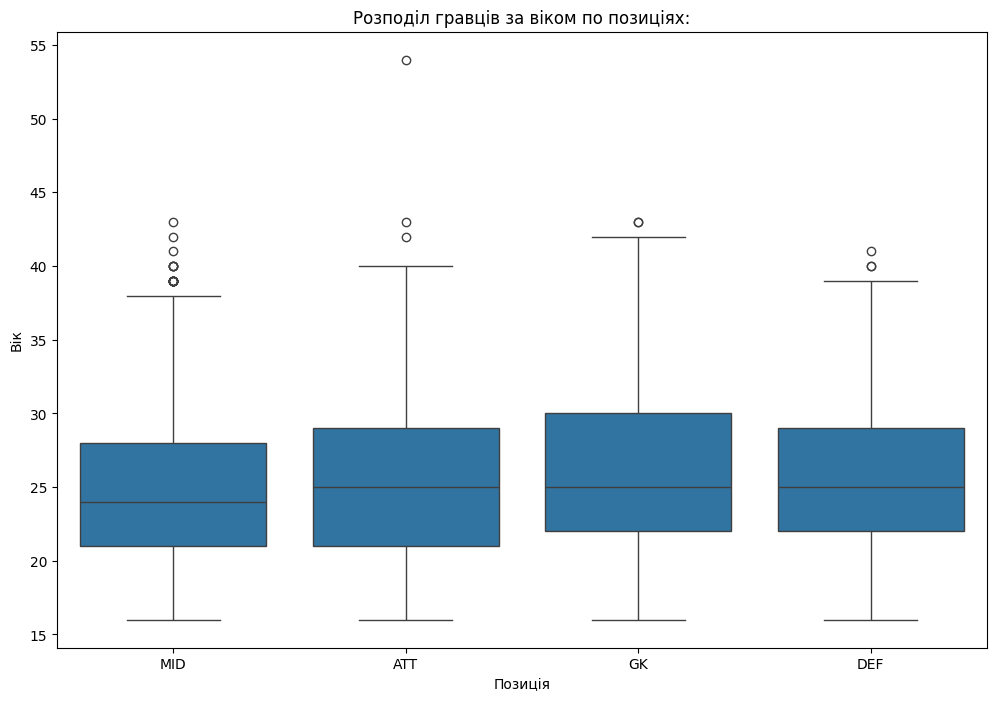

In [36]:
# Діаграма розподілу гравців за віком по позиціях.

plt.figure(figsize=(12, 8))
sns.boxplot(x='position_groups', y='age', data=df_exploded)
plt.title('Розподіл гравців за віком по позиціях:')
plt.xlabel('Позиція')
plt.ylabel('Вік')

plt.show()

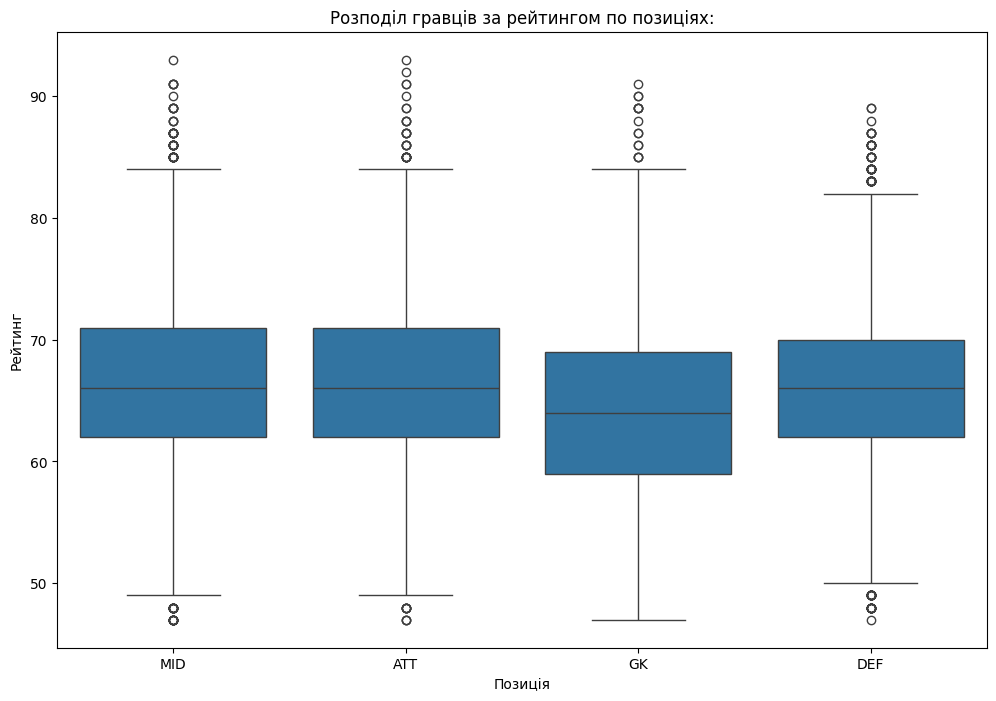

In [37]:
# Діаграма розподілу гравців за рейтингом по позиціях.

plt.figure(figsize=(12, 8))
sns.boxplot(x='position_groups', y='overall', data=df_exploded)
plt.title('Розподіл гравців за рейтингом по позиціях:')
plt.xlabel('Позиція')
plt.ylabel('Рейтинг')

plt.show()

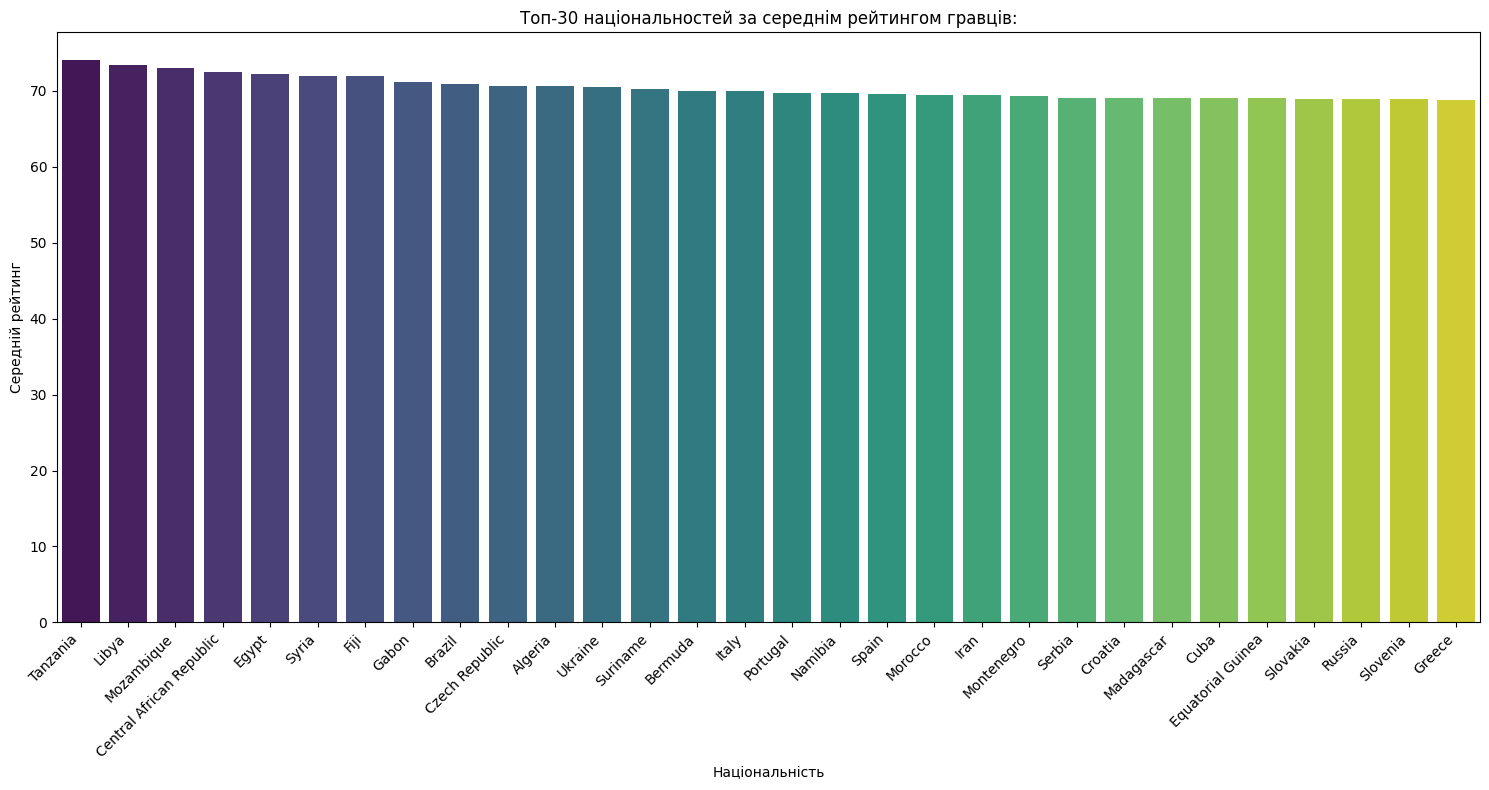

In [38]:
# Діаграма розподілу національностей за рейтингом гравців.

avg_nationality_rating = df.groupby('nationality_name')['overall'].mean().sort_values(ascending=False).head(30)

plt.figure(figsize=(15, 8))
sns.barplot(
    x=avg_nationality_rating.index,
    y=avg_nationality_rating.values,
    palette='viridis',
    hue=avg_nationality_rating.index,
    legend=False
)
plt.title('Топ-30 національностей за середнім рейтингом гравців:')
plt.xlabel('Національність')
plt.ylabel('Середній рейтинг')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Аналіз:

In [39]:
# Оцінка якості пенальтіста:

def calculate_penalties_score(row):
    return (row['mentality_penalties'] * 0.4 +
            row['mentality_composure'] * 0.3 +
            row['power_shot_power'] * 0.2 +
            row['skill_fk_accuracy'] * 0.1)

df['penalties_score'] = df.apply(calculate_penalties_score, axis=1)

print(df[['long_name', 'penalties_score']].sort_values(by='penalties_score', ascending=False).head(10))

                               long_name  penalties_score
2    Cristiano Ronaldo dos Santos Aveiro             90.9
3          Neymar da Silva Santos Júnior             89.8
28         Bruno Miguel Borges Fernandes             89.0
1                     Robert Lewandowski             88.9
9                             Harry Kane             88.4
22                   Sergio Ramos García             86.6
4                        Kevin De Bruyne             86.4
53                   Daniel Parejo Muñoz             85.9
179                      Andrej Kramarić             85.9
75                           Eden Hazard             85.8


In [40]:
# Оцінка якості воротаря, що відбиває пенальті:

def calculate_gk_score(row):
    return (row['goalkeeping_reflexes'] * 0.3 +
            row['goalkeeping_diving'] * 0.2 +
            row['goalkeeping_positioning'] * 0.2 +
            row['mentality_composure'] * 0.3)

df['gk_pen_score'] = df.apply(calculate_gk_score, axis=1)

print(df[['long_name', 'gk_pen_score']].sort_values(by='gk_pen_score', ascending=False).head(10))

                    long_name  gk_pen_score
8       Marc-André ter Stegen          83.2
5                   Jan Oblak          82.8
7          Manuel Peter Neuer          82.8
21       Gianluigi Donnarumma          82.6
18  Ederson Santana de Moraes          82.4
26        Keylor Navas Gamboa          82.0
48           Samir Handanovič          81.4
20      Alisson Ramsés Becker          81.4
31                Hugo Lloris          80.9
34   Wojciech Tomasz Szczęsny          80.5


In [41]:
club_best_pen = df.groupby('club_name')['penalties_score'].max()
club_best_gk = df.groupby('club_name')['gk_pen_score'].max()

comparison = pd.DataFrame({
    'best_pen_score': club_best_pen,
    'best_gk_score': club_best_gk
})
comparison.dropna(inplace=True)

comparison['pen_vs_gk'] = np.where(comparison['best_pen_score'] > comparison['best_gk_score'],
                                   comparison['best_pen_score'] - comparison['best_gk_score'],
                                   0)
                                   
comparison['gk_vs_pen'] = np.where(comparison['best_gk_score'] > comparison['best_pen_score'],
                                   comparison['best_gk_score'] - comparison['best_pen_score'],
                                   0)

# Клуби, де пенальтисти (на 10% або більше) кращі за воротарів
pen_better_than_gk = comparison[comparison['best_pen_score'] > comparison['best_gk_score'] * 1.1]

print("Клуби, де пенальтисти кращі за воротарів:")
print(pen_better_than_gk.drop('gk_vs_pen', axis=1).sort_values(by='pen_vs_gk', ascending=False).head(10))

print("\n")

# Клуби, де воротарі (на 10% або більше) кращі за пенальтистів
gk_better_than_pen = comparison[comparison['best_gk_score'] > comparison['best_pen_score'] * 1.1]

print("Клуби, де воротарі кращі за пенальтистів:")
print(gk_better_than_pen.drop('pen_vs_gk', axis=1).sort_values(by='gk_vs_pen', ascending=False).head(10))

Клуби, де пенальтисти кращі за воротарів:
                           best_pen_score  best_gk_score  pen_vs_gk
club_name                                                          
K Beerschot VA                       82.6           57.8       24.8
Mumbai City FC                       72.1           48.0       24.1
Yokohama FC                          79.2           55.6       23.6
1. FC Union Berlin                   85.2           62.0       23.2
SV Waldhof Mannheim 07               79.0           55.9       23.1
Daegu FC                             73.2           50.3       22.9
Al Nassr                             78.6           56.1       22.5
Belenenses SAD                       74.9           53.7       21.2
Al Taawoun                           69.4           48.9       20.5
RZ Pellets Wolfsberger AC            77.0           56.6       20.4


Клуби, де воротарі кращі за пенальтистів:
Empty DataFrame
Columns: [best_pen_score, best_gk_score, gk_vs_pen]
Index: []


In [42]:
# 10% виявилось забагато, тому знизимо до 5%
gk_better_than_pen = comparison[comparison['best_gk_score'] > comparison['best_pen_score'] * 1.05]

print("Клуби, де воротарі кращі за пенальтистів:")
print(gk_better_than_pen.drop('pen_vs_gk', axis=1).sort_values(by='gk_vs_pen', ascending=False).head(10))

Клуби, де воротарі кращі за пенальтистів:
                 best_pen_score  best_gk_score  gk_vs_pen
club_name                                                
PFC CSKA Moscow            71.2           77.1        5.9
Rosenborg BK               67.2           72.8        5.6
Östersunds FK              61.7           67.1        5.4
Parma                      71.9           77.0        5.1
IK Sirius                  60.5           65.3        4.8
PEC Zwolle                 63.6           68.1        4.5
Piast Gliwice              63.3           67.5        4.2
Ferencvárosi TC            66.9           70.6        3.7
Kristiansund BK            60.6           64.2        3.6


In [43]:
# Топ 10 клубів в яких найкращі пенальтисти:

top_10_pen_clubs = df.groupby('club_name')['penalties_score'].mean().sort_values(ascending=False).head(10)

print("Топ-10 клубів з найкращими пенальтистами:")
print(top_10_pen_clubs)

Топ-10 клубів з найкращими пенальтистами:
club_name
Juventus               65.773077
Real Madrid CF         64.912121
Manchester United      64.842424
Paris Saint-Germain    64.830303
Napoli                 63.580769
SL Benfica             63.400000
Inter                  63.400000
Manchester City        63.371875
RB Bragantino          63.140000
Fluminense             62.565000
Name: penalties_score, dtype: float64


In [44]:
# Топ 10 клубів в яких найкращі воротарі:

top_10_gk_clubs = df.groupby('club_name')['gk_pen_score'].mean().sort_values(ascending=False).head(10)

print("Топ-10 клубів з найкращими воротарями:")
print(top_10_gk_clubs)

Топ-10 клубів з найкращими воротарями:
club_name
Paris Saint-Germain    36.166667
Inter                  35.692857
Liverpool              34.948485
Manchester United      34.930303
Ajax                   34.882759
Atlético de Madrid     34.753125
Sporting CP            34.720000
FC Barcelona           34.487879
Atalanta               34.452000
Juventus               34.346154
Name: gk_pen_score, dtype: float64


Бізнес аналітика та інсайти:

Якщо мені треба зацікавити моїми даними і моделями, можна виділити 3 категорії потенційних клієнтів:
- футбольні агенти і скаути
- футбольні клуби
- спортивні інвестори та аналітичні, консалтингові компанії

На основі даних про заробітні плати і вартість гравців ми можемо аналізувати ринок праці, а завдяки деталізованій оцінці різноманітних навичок гравців ми можемо шукати гравців первного типу - наприклад, ідеальний центральний захисник - швидкий, з хорошим пасом і високою фізичною силою.

Приклади пропозицій:

1. Можна створити модель для підбора "ідеального гравця" для якоїсь позиції на основі характеристик спортсмена. Це дозволить значно звузити пошук і заощадити час на пошук підходящого кандидата.

2. Також можна прогнозувати потенційну вартість гравця і знаходити завдяки цьому гравців з високим потенціалом за меншу ціну.

3. Можна на основі даних робити регулярний моніторінг молодих талантів, наприклад, робити топ молодих гравців, які ще не грають у провідних лігах. 
Або слідкувати, у яких гравців з високим рейтингом або вигідними характеристиками скоро закінчується контракт з їх клубом і вчасно зробити їм пропозицію.

4. Також можна робити дослідження для інвесторів, оцінку ефективності інвестицій - які клуби є найкращими із розрахунку ціна/якість. Наприклад, порявняти середні зарплати гравців з їх середнім рейтингом. 

5. Можна використовувати тренди по країнах для пошуку нових ринків талантів - наприклад якщо є дані про якісь країни, де гравці в середньому мають високі характеристики, але нижчу оплату, агенти можуть зосередити свою увагу на цих регіонах для пошуку нових талантів.

6. Також ці дані можна використовувати для прогнозування як індивідквльних результатів окремих граців, так і резулькатів матчів між командами. Але для таких прогнозів потрібні додаткові динамічні дані з результатами команд за певний час, інформація про травми, дискваліфікації, тощо.

7. Також різноманітні рейтинги загалом, по клубах і регіонах можуть бути використаними виробниками спортивного одягу і обладнення в маркетингових цілях - для пощуку нових облич для рекламних контрактів, або нових перспективних ринків.


EDA

In [45]:
print("Загальна інформація:")
df.info()

print("\n--------------------\n")

print(f"Розмір датасету: {df.shape}")

print("\n--------------------\n")

print("Кількість пропущених значень у кожній колонці:")
print(df.isnull().sum().sort_values(ascending=False))

print("\n--------------------\n")

print("Кількість унікальних значень у колонці player_positions:")
print(df['player_positions'].nunique())

print("\n--------------------\n")

print("\nСтатистичний опис числових колонок:")
print(df.describe())

Загальна інформація:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 83 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sofifa_id                    19239 non-null  int64  
 1   player_url                   19239 non-null  object 
 2   short_name                   19239 non-null  object 
 3   long_name                    19239 non-null  object 
 4   player_positions             19239 non-null  object 
 5   overall                      19239 non-null  int64  
 6   potential                    19239 non-null  int64  
 7   value_eur                    19165 non-null  float64
 8   wage_eur                     19178 non-null  float64
 9   age                          19239 non-null  int64  
 10  dob                          19239 non-null  object 
 11  height_cm                    19239 non-null  int64  
 12  weight_kg                    19239 non-null  int64  


In [46]:
outfield_players_df = df[~df['player_positions'].str.contains('GK', na=False)]
outfield_players_df.filter(like='goalkeeping_').describe()

,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,0.0
mean,10.348278,10.394400,10.360905,10.374408,10.331209,NaN
std,3.014356,2.996763,3.038509,3.003612,3.034192,NaN
min,2.000000,2.000000,2.000000,2.000000,2.000000,NaN
25%,8.000000,8.000000,8.000000,8.000000,8.000000,NaN
50%,10.000000,10.000000,10.000000,10.000000,10.000000,NaN
75%,13.000000,13.000000,13.000000,13.000000,13.000000,NaN
max,32.000000,33.000000,38.000000,33.000000,37.000000,NaN


Бачимо, що аж 17 тисяч польових гравців мають оцінку в атрибутах воротарів. Можливо, на ці навички тестують і тих гравців, що не є воротарями, або ці значення помилкові, але ми не можемо просто незважати на них, бо кількість дуже велика. Проте ми бачимо, що атрибут goalkeeping_speed є тільки в голкіперів, тому для ідкетифікації ми можемо спиратись на нього (або навпаки, цей атрибут може заважати при прогнозі через надмірний вплив).

In [47]:
goalkeepers_df = df[df['player_positions'].str.contains('GK', na=False)]
print(goalkeepers_df.shape)
goalkeepers_df.filter(regex='mentality_penalties|mentality_positioning|defending_|attacking_').describe()

(2132, 83)


,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,mentality_positioning,mentality_penalties,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,13.833490,10.925891,13.914634,27.093809,11.203565,10.082083,18.587242,13.583959,13.729362,13.624765
std,3.621452,4.131025,3.744946,8.059237,4.374516,4.289316,6.716585,5.967689,3.203767,3.149923
min,6.000000,2.000000,5.000000,7.000000,3.000000,2.000000,7.000000,4.000000,5.000000,5.000000
25%,11.000000,8.000000,11.000000,22.000000,8.000000,6.000000,14.000000,9.000000,11.000000,11.000000
50%,13.000000,10.000000,13.000000,26.000000,11.000000,10.000000,17.000000,12.000000,13.000000,13.000000
75%,15.000000,14.000000,15.000000,31.000000,15.000000,13.000000,22.000000,18.000000,15.000000,15.000000
max,34.000000,27.000000,47.000000,61.000000,26.000000,20.000000,58.000000,30.000000,25.000000,25.000000


In [48]:
goalkeepers_df['goalkeeping_speed'].describe()

count    2132.000000
mean       36.439962
std        10.751563
min        15.000000
25%        27.000000
50%        36.000000
75%        45.000000
max        65.000000
Name: goalkeeping_speed, dtype: float64

Всі воротарі мають записи параметрів, що стосуються не воротарів. Скоріш за все, всі гравці підлягають оцінці навіть тих параметрів, які не відповідють їх позиції. Але goalkeeping_speed є тільки у гравців з 'GK' в player_positions, що підтверджує те, що ми можемо орієнтуватись на цю колонку, як атрибут голкіпера.
А також є атрибути, якіх немає у голкіперів (NA відпосідає кількості голкіперів):
passing - 2132
shooting - 2132 
pace - 2132
defending - 2132 
physic - 2132 
dribbling - 2132

In [49]:
# чи є гравці, в яких не вказана позиція? 

df['player_positions'].isna().sum()

np.int64(0)

Проаналізуємо кореляцію між атрибутами, для групування їх у майбутньому:

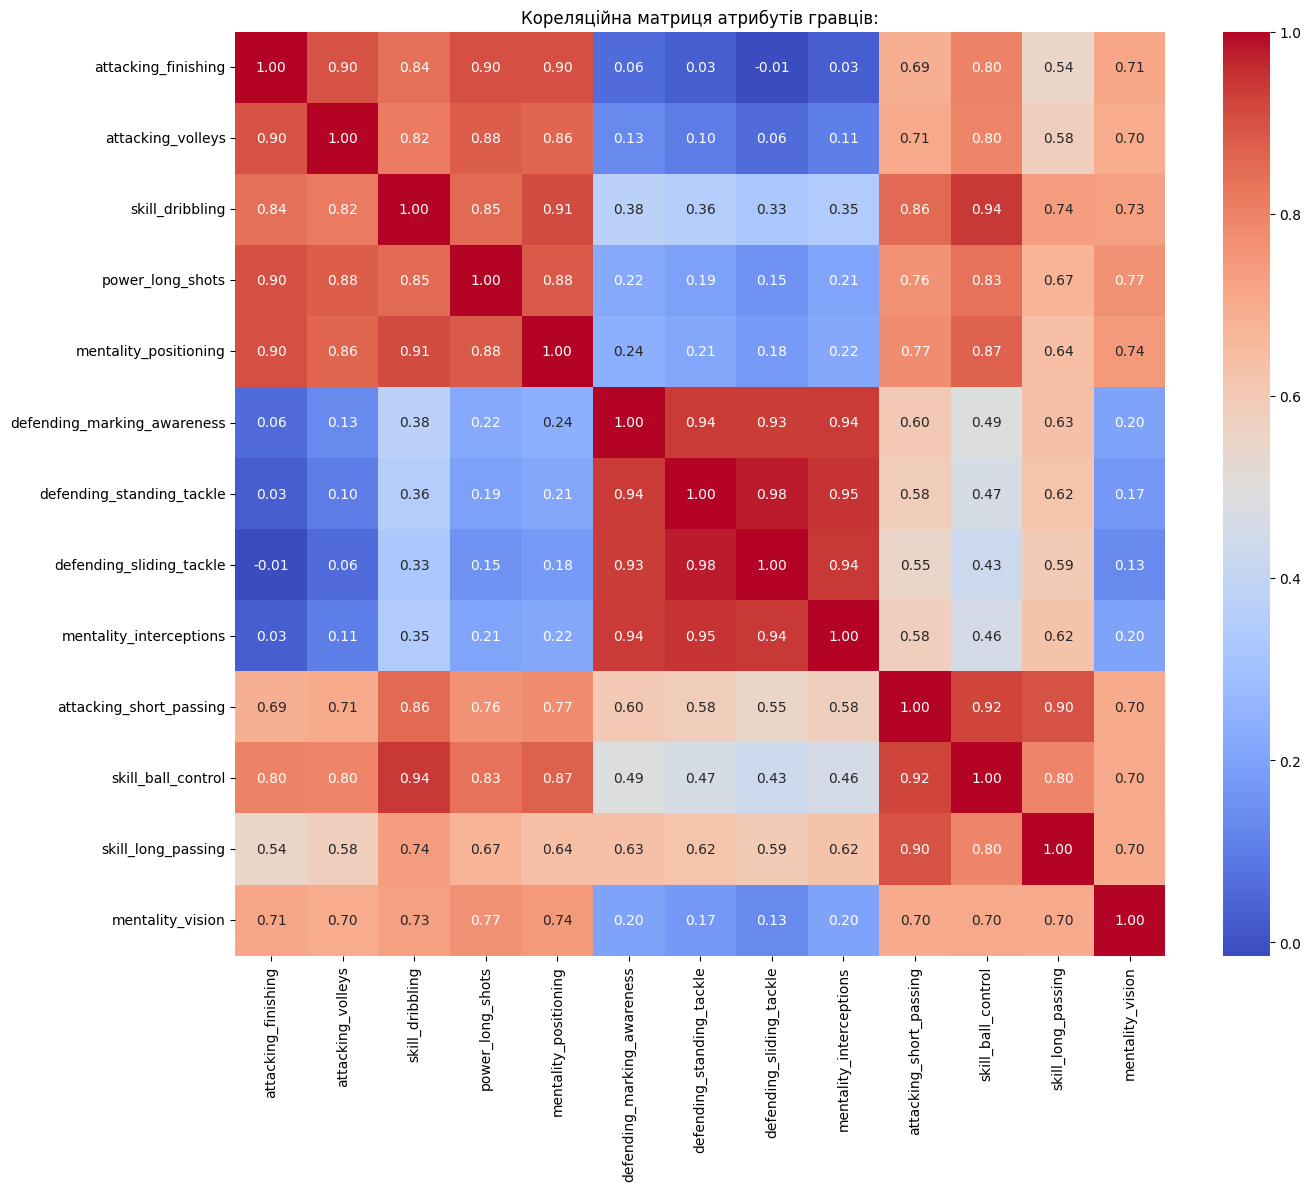

In [50]:
attacking_cols = ['attacking_finishing', 'attacking_volleys', 'skill_dribbling', 'power_long_shots', 'mentality_positioning']

defending_cols = ['defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'mentality_interceptions']

passing_cols = ['attacking_short_passing', 'skill_ball_control', 'skill_long_passing', 'mentality_vision']

all_skills_df = df[attacking_cols + defending_cols + passing_cols]

correlation_matrix = all_skills_df.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Кореляційна матриця атрибутів гравців:')
plt.show()

Кількість викидів за рейтингом 'overall': 159

Приклади викидів:
          short_name  overall            club_name
0           L. Messi       93  Paris Saint-Germain
1     R. Lewandowski       92    FC Bayern München
2  Cristiano Ronaldo       91    Manchester United
3          Neymar Jr       91  Paris Saint-Germain
4       K. De Bruyne       91      Manchester City


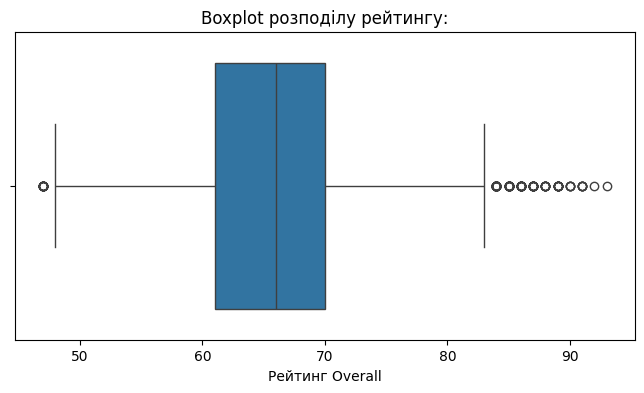

In [51]:
Q1 = df['overall'].quantile(0.25)
Q3 = df['overall'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_overall = df[(df['overall'] < lower_bound) | (df['overall'] > upper_bound)]

print("Кількість викидів за рейтингом 'overall':", len(outliers_overall))
print("\nПриклади викидів:")
print(outliers_overall[['short_name', 'overall', 'club_name']].head())

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['overall'])
plt.title('Boxplot розподілу рейтингу:')
plt.xlabel('Рейтинг Overall')
plt.show()

В нашому випадку ці викиди видаляти не варто, так як ця інформація може бути важливою для розпізнання гравців світового класу. Кращім варіантом буде наприклад, використання стійких до викидів моделей.

feature engineering, підготовка потрібніх змінних для моделювання:

В першу чергу потрібно зробити спрощений список позицій - замість 20+ різних позицій, зведемо їх до 4-5 основних категорій, що має спростити завдання класифікації. В аналітичному блоці я вже робила спрощений список категорій, але для класифікаційної моделі треба зробити не список категорій, а присвоїти кожному гравцю окрему спрощену категорію. Тому повторимо цей процес, але зі змінами:

In [52]:
def classify_main_position(positions):
    positions_list = [pos.strip() for pos in positions.split(',')]
    
    # зробимо припущення, що перша позиція в списку - головна
    main_pos = positions_list[0]
    
    if main_pos in ['GK']:
        return 'Goalkeeper'
    if main_pos in defenders:
        return 'Defender'
    if main_pos in midfielders:
        return 'Midfielder'
    if main_pos in forwards:
        return 'Forward'
    return 'Other'


df['main_position'] = df['player_positions'].apply(classify_main_position)
df[['short_name', 'main_position']].head(10)

,short_name,main_position
0,L. Messi,Midfielder
1,R. Lewandowski,Forward
2,Cristiano Ronaldo,Forward
3,Neymar Jr,Midfielder
4,K. De Bruyne,Midfielder
5,J. Oblak,Goalkeeper
6,K. Mbappé,Forward
7,M. Neuer,Goalkeeper
8,M. ter Stegen,Goalkeeper
9,H. Kane,Forward


In [53]:
# перевіримо, чи співпадає кількість воротарів
df['main_position'].value_counts()['Goalkeeper']

np.int64(2132)

Можна спробувати створити індекси, які обʼєднають декілька повʼязаних атрибутів, щоб модель могла працювати з меньшою кількістю змінних. Наприклад, поєднати навички, важливі для нападників в узагальнений індекс. Для групування допоможе також матриця кореляції, зроблена вище.

In [54]:
# атрибути нападників:
df['attack_index'] = df[['attacking_finishing', 'attacking_heading_accuracy', 
                        'attacking_short_passing', 'attacking_volleys', 
                        'power_shot_power', 'power_long_shots']].mean(axis=1)

# атрибути захисників:
df['defense_index'] = df[['defending_marking_awareness', 'defending_standing_tackle', 
                          'defending_sliding_tackle', 'mentality_interceptions', 
                          'power_strength']].mean(axis=1)

# навички пасу (для напівзахисників):
df['passing_index'] = df[['attacking_short_passing','skill_long_passing',
                        'mentality_vision']].mean(axis=1)

# навички воротаря:
df['goalkeeping_index'] = df[['goalkeeping_handling','goalkeeping_diving', 'goalkeeping_kicking',
                        'goalkeeping_positioning', 'goalkeeping_reflexes']].mean(axis=1)

# індекс сили гравця:
df['strength_index'] = df[['power_strength', 'power_stamina', 'power_jumping']].mean(axis=1)

# індекс швидкості:
df['speed_index'] = df[['movement_acceleration', 'movement_sprint_speed']].mean(axis=1)

# ментальний індекс:
df['mentality_index'] = df[['mentality_composure', 'mentality_aggression', 'mentality_positioning', 'mentality_vision']].mean(axis=1)


Заповнимо пропущені значення у колонці goalkeeping_speed нулем - це перетворить колонку на числову, де нуль означатиме, що гравець не є воротарем, а будь-яке інше значення (що є рейтингом) - зі 100% визначатиме воротаря.

In [55]:
print("\n" + "-" * 50)
print("АНАЛІЗ ПРОПУЩЕНИХ ЗНАЧЕНЬ")
print("-" * 50)

gk_skills = ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 
             'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']

print("Воротарські навички:")
for skill in gk_skills:
    has_value = df[skill].notna().sum()
    is_gk = df[df[skill].notna()]['player_positions'].str.contains('GK', na=False).sum()
    nan = df[skill].isna().sum()
    print(f"{skill}:")
    print(f"  - Має значення: {has_value} гравців")
    print(f"  - З них воротарі: {is_gk}")
    print(f"  - Польових гравців з цією навичкою: {has_value - is_gk}")
    print(f"  - Пропуски: {nan}")


--------------------------------------------------
АНАЛІЗ ПРОПУЩЕНИХ ЗНАЧЕНЬ
--------------------------------------------------
Воротарські навички:
goalkeeping_diving:
  - Має значення: 19239 гравців
  - З них воротарі: 2132
  - Польових гравців з цією навичкою: 17107
  - Пропуски: 0
goalkeeping_handling:
  - Має значення: 19239 гравців
  - З них воротарі: 2132
  - Польових гравців з цією навичкою: 17107
  - Пропуски: 0
goalkeeping_kicking:
  - Має значення: 19239 гравців
  - З них воротарі: 2132
  - Польових гравців з цією навичкою: 17107
  - Пропуски: 0
goalkeeping_positioning:
  - Має значення: 19239 гравців
  - З них воротарі: 2132
  - Польових гравців з цією навичкою: 17107
  - Пропуски: 0
goalkeeping_reflexes:
  - Має значення: 19239 гравців
  - З них воротарі: 2132
  - Польових гравців з цією навичкою: 17107
  - Пропуски: 0
goalkeeping_speed:
  - Має значення: 2132 гравців
  - З них воротарі: 2132
  - Польових гравців з цією навичкою: 0
  - Пропуски: 17107


In [56]:
df['goalkeeping_speed'] = df['goalkeeping_speed'].fillna(0)

In [57]:
print("\n" + "-" * 50)
print("Заповнення пропусків:")
print("-" * 50)


goalkeepers_mask = df['player_positions'].str.contains('GK', na=False)
outfield_mask = ~goalkeepers_mask

print(f"\nВоротарів у датасеті: {goalkeepers_mask.sum()}")
print(f"Польових гравців: {outfield_mask.sum()}")



print("\n\n ПОЛЬОВІ НАВИЧКИ")
print("-" * 50)

outfield_skills = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

print(f"\nПеревіряємо хто має пропуски:")
for skill in outfield_skills:
    total_nulls = df[skill].isna().sum()
    gk_nulls = df.loc[goalkeepers_mask, skill].isna().sum()
    outfield_nulls = df.loc[outfield_mask, skill].isna().sum()
    
    print(f"\n{skill}:")
    print(f"  Всього пропусків: {total_nulls}")
    print(f"  Воротарі: {gk_nulls}")
    print(f"  Польові: {outfield_nulls}")


print("\n\n ФІНАНСОВІ ДАНІ")
print("-" * 50)

financial = ['value_eur', 'wage_eur']
for col in financial:
    nulls = df[col].isna().sum()
    percent = nulls / len(df) * 100
    if nulls > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"{col}: {nulls} пропусків ({percent:.2f}%) -> медіана {median_val:,.0f}")
    else:
        print(f"{col}: немає пропусків")



--------------------------------------------------
Заповнення пропусків:
--------------------------------------------------

Воротарів у датасеті: 2132
Польових гравців: 17107


 ПОЛЬОВІ НАВИЧКИ
--------------------------------------------------

Перевіряємо хто має пропуски:

pace:
  Всього пропусків: 2132
  Воротарі: 2132
  Польові: 0

shooting:
  Всього пропусків: 2132
  Воротарі: 2132
  Польові: 0

passing:
  Всього пропусків: 2132
  Воротарі: 2132
  Польові: 0

dribbling:
  Всього пропусків: 2132
  Воротарі: 2132
  Польові: 0

defending:
  Всього пропусків: 2132
  Воротарі: 2132
  Польові: 0

physic:
  Всього пропусків: 2132
  Воротарі: 2132
  Польові: 0


 ФІНАНСОВІ ДАНІ
--------------------------------------------------
value_eur: 74 пропусків (0.38%) -> медіана 975,000
wage_eur: 61 пропусків (0.32%) -> медіана 3,000


In [ ]:
from sklearn.impute import KNNImputer

print("-" * 50)
print("Заповнення польових навичок воротарів:")
print("-" * 50)


print(f"\nВоротарів з пропусками: {df.loc[goalkeepers_mask, 'pace'].isna().sum()}")

# Features для пошуку схожих за характеристиками гравців (ті, що є у всіх)
similarity_features = [
    'age', 'height_cm', 'weight_kg', 'overall', 'potential',
    'weak_foot', 'skill_moves', 'international_reputation',
    'power_strength', 'power_stamina', 'power_jumping',
    'movement_balance', 'mentality_composure',
    'goalkeeping_diving', 'goalkeeping_handling', 
    'goalkeeping_positioning', 'goalkeeping_reflexes'
] + outfield_skills

# KNN Imputation
imputer = KNNImputer(n_neighbors=5, weights='distance')
df_temp = df[similarity_features].copy()
df_imputed = pd.DataFrame(
    imputer.fit_transform(df_temp),
    columns=df_temp.columns,
    index=df_temp.index
)

# Оновлюємо тільки воротарів
for skill in outfield_skills:
    df.loc[goalkeepers_mask, skill] = df_imputed.loc[goalkeepers_mask, skill]


print("\nРезультат (приклад топ-5 воротарів):")
print(df[goalkeepers_mask].head()[['short_name', 'height_cm', 'weight_kg', 'age', 'pace', 'shooting']])

--------------------------------------------------
Заповнення польових навичок воротарів:
--------------------------------------------------

Воротарів з пропусками: 2132

Результат (приклад топ-5 воротарів):
       short_name  height_cm  weight_kg  age       pace   shooting
5        J. Oblak        188         87   28  53.112890  65.163898
7        M. Neuer        193         93   35  53.053269  65.113878
8   M. ter Stegen        187         85   29  52.991695  65.043269
12    T. Courtois        199         96   29  52.955871  65.020736
18        Ederson        188         86   27  53.046115  65.116477


In [59]:
modeling_features = [
    'overall', 'age', 'height_cm', 'weight_kg',
    'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
    'attack_index', 'defense_index', 'passing_index',
    'goalkeeping_index', 'goalkeeping_speed', 'strength_index', 
    'speed_index', 'mentality_index'
]

Для завдання класифікації гравців за позиціями логічним вибором є Embedded Methods, зокрема моделі на основі дерев, такі як Random Forest, або Gradient Boosting (e.g., XGBoost, LightGBM, CatBoost)
Random Forest не чутливий до викидів, що ідеально підходить для нашого датасету.
Можна навчити модель на обраних ознаках, а потім отримати feature_importances_ з результатів.
Цей метод автоматично виявляє найбільш значущі ознаки, не вимагаючи від вас ручного перебору.
Спробуємо навчити модель Random Forest Classifier, а потім використовувати її для аналізу важливості ознак.

Моделювання:

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold

In [61]:
X = df[modeling_features]
y = df['main_position']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("Random Forest Classifier:")
print(f"Точність: {accuracy_score(y_test, y_pred):.4f}")
print("Звіт класифікації:\n", classification_report(y_test, y_pred))

Random Forest Classifier:
Точність: 0.9119
Звіт класифікації:
               precision    recall  f1-score   support

    Defender       0.92      0.92      0.92      1281
     Forward       0.90      0.84      0.87       522
  Goalkeeper       1.00      1.00      1.00       403
  Midfielder       0.89      0.91      0.90      1642

    accuracy                           0.91      3848
   macro avg       0.93      0.92      0.92      3848
weighted avg       0.91      0.91      0.91      3848



Модель показала високу точність - 91.19%, що свідчить про ефективний feature engineering.
Результати для класів:
Goalkeeper: Precision та recall становлять 1.00. Це означає, що модель ідеально ідентифікує воротарів, не плутаючи їх з іншими гравцями. Це очікувано, оскільки goalkeeping_speed дозваляє точно розпізнавати голкіперів.
Defender та Midfielder: Модель добре справляється з цими класами, з f1-score 0.92 та 0.90. Це свідчить, що створені індекси успішно розрізняють ці дві групи.
Forward: Precision 0.90, а recall є трохи нижчим за інші групи - 0.87. Це може пояснюватись тим, що межа між атакувальними півзахисниками та нападниками є менш чіткою, ніж, наприклад, між воротарями та польовими гравцями.

--------------------------------------------------
Кросвалідація моделі:
--------------------------------------------------

Параметри моделі:
  n_estimators: 50
  max_depth: 20
  min_samples_split: 10
  min_samples_leaf: 5


1. Кросвалідація за accuracy
--------------------------------------------------

Результати 5-fold CV:
  Fold 1: 0.9061
  Fold 2: 0.9003
  Fold 3: 0.9084
  Fold 4: 0.9081
  Fold 5: 0.9084

Підсумок:
  Середня точність: 0.9062
  Стандартне відхилення: 0.0031
  95% довірчий інтервал: [0.9000, 0.9125]


2. Розширена кросвалідація
--------------------------------------------------

Результати кросвалідації:

Метрика              Train        Test         Різниця     
--------------------------------------------------------
accuracy             0.9585±0.0007  0.9062±0.0031  +0.0523
precision_macro      0.9665±0.0007  0.9217±0.0029  +0.0448
recall_macro         0.9596±0.0009  0.9126±0.0033  +0.0470
f1_macro             0.9629±0.0006  0.9168±0.0024  +0.0461

Аналіз:
Моде

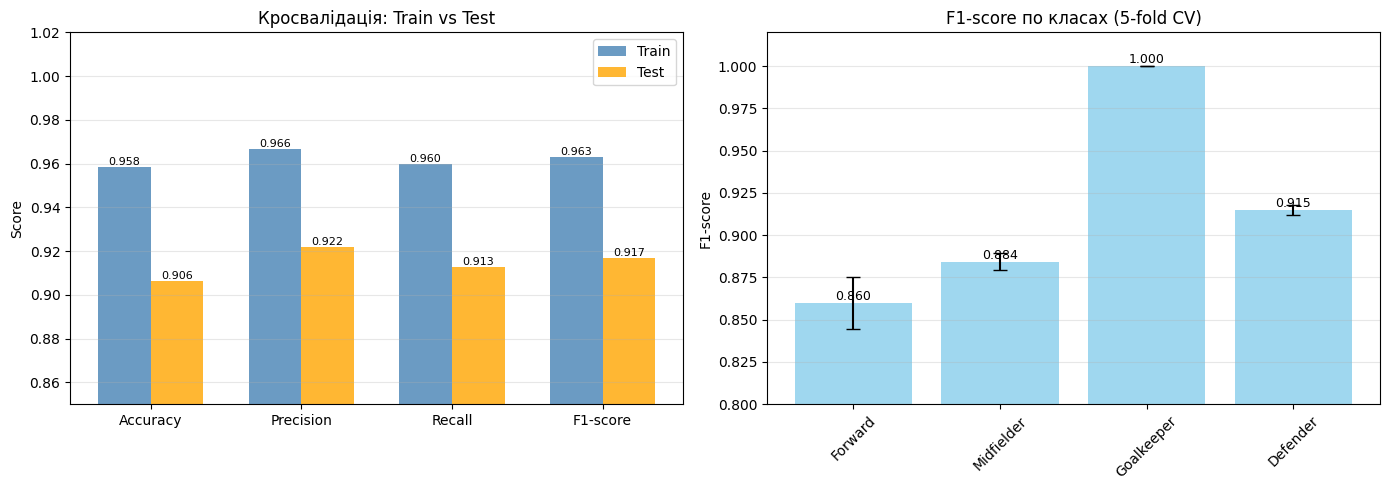


Кросвалідація завершена!


5. Фінальне навчання та оцінка на test set
--------------------------------------------------

Точність на test set: 0.9085

Порівняння:
  CV accuracy:   0.9062 ± 0.0031
  Test accuracy: 0.9085
  Різниця:       0.0023

Test accuracy збігається з CV! Модель стабільна.

ПІДСУМОК
Модель: Random Forest
  - n_estimators: 50
  - max_depth: 20
  - min_samples_split: 10
  - min_samples_leaf: 5

Результати:
  - CV accuracy: 0.9062 ± 0.0031
  - Test accuracy: 0.9085
  - Train-Test gap: +0.0523


In [70]:
print("-" * 50)
print("Кросвалідація моделі:")
print("-" * 50)

model = RandomForestClassifier(
    n_estimators=50,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

print(f"\nПараметри моделі:")
print(f"  n_estimators: {model.n_estimators}")
print(f"  max_depth: {model.max_depth}")
print(f"  min_samples_split: {model.min_samples_split}")
print(f"  min_samples_leaf: {model.min_samples_leaf}")


print("\n\n1. Кросвалідація за accuracy")
print("-" * 50)

cv_scores = cross_val_score(
    model,
    X_train_scaled, 
    y_train, 
    cv=5,
    scoring='accuracy'
)

print(f"\nРезультати 5-fold CV:")
for i, score in enumerate(cv_scores, 1):
    print(f"  Fold {i}: {score:.4f}")

print(f"\nПідсумок:")
print(f"  Середня точність: {cv_scores.mean():.4f}")
print(f"  Стандартне відхилення: {cv_scores.std():.4f}")
print(f"  95% довірчий інтервал: [{cv_scores.mean() - 2*cv_scores.std():.4f}, "
      f"{cv_scores.mean() + 2*cv_scores.std():.4f}]")


print("\n\n2. Розширена кросвалідація")
print("-" * 50)

scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro'
}

cv_results = cross_validate(
    model,
    X_train_scaled,
    y_train,
    cv=5,
    scoring=scoring,
    return_train_score=True
)

print("\nРезультати кросвалідації:")
print(f"\n{'Метрика':<20} {'Train':<12} {'Test':<12} {'Різниця':<12}")
print("-" * 56)

for metric in ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']:
    train_mean = cv_results[f'train_{metric}'].mean()
    test_mean = cv_results[f'test_{metric}'].mean()
    diff = train_mean - test_mean
    
    print(f"{metric:<20} {train_mean:.4f}±{cv_results[f'train_{metric}'].std():.4f}  "
          f"{test_mean:.4f}±{cv_results[f'test_{metric}'].std():.4f}  "
          f"{diff:+.4f}")

print("\nАналіз:")
overfitting = cv_results['train_accuracy'].mean() - cv_results['test_accuracy'].mean()
if overfitting > 0.08:
    print(f"Можливий overfitting (різниця {overfitting:.4f})")
    print("     Рекомендації: зменшити n_estimators або max_depth")
elif overfitting < 0:
    print(f"Незвичайно: test > train (різниця {overfitting:.4f})")
else:
    print(f"Модель добре узагальнює (різниця {overfitting:.4f})")


print("\n\n3. Кросвалідація по класах")
print("-" * 50)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
class_scores = {cls: [] for cls in y_train.unique()}

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, y_train), 1):
    model_cv = RandomForestClassifier(
        n_estimators=model.n_estimators,
        max_depth=model.max_depth,
        min_samples_split=model.min_samples_split,
        min_samples_leaf=model.min_samples_leaf,
        random_state=42
    )
    model_cv.fit(X_train_scaled[train_idx], y_train.iloc[train_idx])
    
    # Прогнозуємо
    y_pred_cv = model_cv.predict(X_train_scaled[val_idx])
    
    # Рахуємо метрики для кожного класу
    report = classification_report(
        y_train.iloc[val_idx], 
        y_pred_cv, 
        output_dict=True,
        zero_division=0
    )
    
    for cls in class_scores.keys():
        if cls in report:
            class_scores[cls].append(report[cls]['f1-score'])

print("\nF1-score по класах (середнє по 5 фолдах):")
print(f"\n{'Клас':<15} {'F1-score':<12} {'Std':<12}")
print("-" * 39)

for cls in sorted(class_scores.keys()):
    scores = class_scores[cls]
    if len(scores) > 0:
        mean_score = np.mean(scores)
        std_score = np.std(scores)
        print(f"{cls:<15} {mean_score:.4f}      ±{std_score:.4f}")


print("\n\n4. Візуалізація")
print("-" * 50)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Графік 1: Порівняння train vs test
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
train_scores = [cv_results[f'train_{m}'].mean() 
                for m in ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']]
test_scores = [cv_results[f'test_{m}'].mean() 
               for m in ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']]

x = np.arange(len(metrics_names))
width = 0.35

bars1 = axes[0].bar(x - width/2, train_scores, width, label='Train', alpha=0.8, color='steelblue')
bars2 = axes[0].bar(x + width/2, test_scores, width, label='Test', alpha=0.8, color='orange')
axes[0].set_ylabel('Score')
axes[0].set_title('Кросвалідація: Train vs Test')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics_names)
axes[0].legend()
axes[0].set_ylim([0.85, 1.02])
axes[0].grid(axis='y', alpha=0.3)

# Додаємо значення на стовпці
for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)
for bar in bars2:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# Графік 2: F1-score по класах
classes = list(class_scores.keys())
f1_means = [np.mean(class_scores[cls]) for cls in classes]
f1_stds = [np.std(class_scores[cls]) for cls in classes]

bars = axes[1].bar(classes, f1_means, yerr=f1_stds, capsize=5, alpha=0.8, color='skyblue')
axes[1].set_ylabel('F1-score')
axes[1].set_title('F1-score по класах (5-fold CV)')
axes[1].set_ylim([0.80, 1.02])
axes[1].grid(axis='y', alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

# Додаємо значення
for bar, mean in zip(bars, f1_means):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{mean:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\nКросвалідація завершена!")


print("\n\n5. Фінальне навчання та оцінка на test set")
print("-" * 50)

# Навчаємо на всьому train set
model.fit(X_train_scaled, y_train)

# Прогнозуємо на test
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, classification_report

test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nТочність на test set: {test_accuracy:.4f}")

# Порівнюємо з CV
print(f"\nПорівняння:")
print(f"  CV accuracy:   {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
print(f"  Test accuracy: {test_accuracy:.4f}")
print(f"  Різниця:       {abs(test_accuracy - cv_scores.mean()):.4f}")

if abs(test_accuracy - cv_scores.mean()) < 0.01:
    print("\nTest accuracy збігається з CV! Модель стабільна.")
else:
    print("\nTest accuracy відрізняється від CV більше ніж на 1%")

print("\n" + "=" * 50)
print("ПІДСУМОК")
print("=" * 50)
print(f"Модель: Random Forest")
print(f"  - n_estimators: {model.n_estimators}")
print(f"  - max_depth: {model.max_depth}")
print(f"  - min_samples_split: {model.min_samples_split}")
print(f"  - min_samples_leaf: {model.min_samples_leaf}")
print(f"\nРезультати:")
print(f"  - CV accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
print(f"  - Test accuracy: {test_accuracy:.4f}")
print(f"  - Train-Test gap: {overfitting:+.4f}")
print("=" * 50)

Feature importance:
              feature  importance
10       attack_index    0.119703
11      defense_index    0.113903
5            shooting    0.107388
8           defending    0.099414
12      passing_index    0.091248
13  goalkeeping_index    0.064400
6             passing    0.054831
17    mentality_index    0.053765
14  goalkeeping_speed    0.046176
15     strength_index    0.037702
16        speed_index    0.036817
9              physic    0.031163
4                pace    0.027995
0             overall    0.026872
7           dribbling    0.026359
2           height_cm    0.023511
3           weight_kg    0.021865
1                 age    0.016887


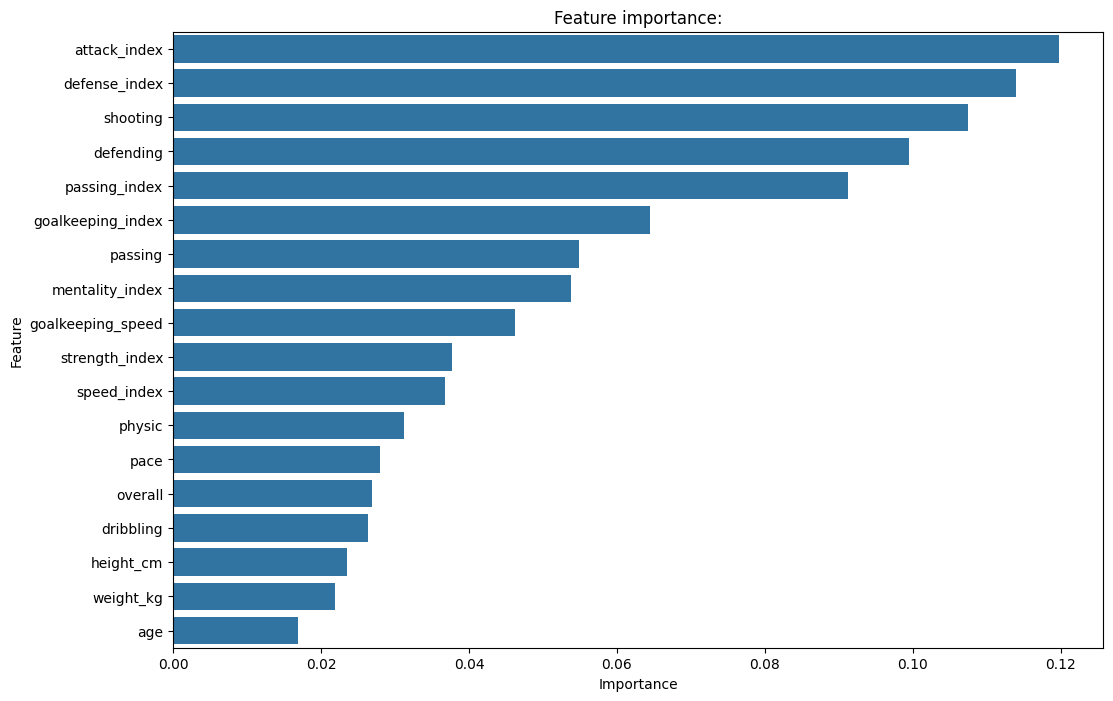

In [62]:
importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': modeling_features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print("Feature importance:")
print(feature_importance_df)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature importance:')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Аналіз feature importance також підтверджує, що обʼєднані в індекси характеристики працюють ефективно, а також важливість для класифікації таких ознак, як shooting, defending та passing.

Друга модель з використанням змінних club_position, nation_position:
(колонки club_position та nation_position містять інформацію про конкретну позицію гравця в його клубі. Ця інформація є дуже близькою до цільової змінної, тому очікуємо зростання точності)

In [63]:
df['club_position'] = df['club_position'].fillna('Unknown')
df['nation_position'] = df['nation_position'].fillna('Unknown')

features_with_pos = modeling_features + ['club_position', 'nation_position']

# Перетворення категоріальних змінних у числові за допомогою One-Hot Encoding
X_with_pos = pd.get_dummies(df[features_with_pos], columns=['club_position', 'nation_position'], drop_first=True)
y = df['main_position']

X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X_with_pos, y, test_size=0.2, random_state=42)

scaler_pos = StandardScaler()
X_train_pos_scaled = scaler_pos.fit_transform(X_train_pos)
X_test_pos_scaled = scaler_pos.transform(X_test_pos)

model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train_pos_scaled, y_train_pos)

y_pred2 = model2.predict(X_test_pos_scaled)
print("\nRandom Forest Classifier з club_position та nation_position:")
print(f"Точність: {accuracy_score(y_test_pos, y_pred2):.4f}")
print("Звіт класифікації:\n", classification_report(y_test_pos, y_pred2))


Random Forest Classifier з club_position та nation_position:
Точність: 0.9241
Звіт класифікації:
               precision    recall  f1-score   support

    Defender       0.94      0.94      0.94      1281
     Forward       0.90      0.84      0.87       522
  Goalkeeper       1.00      1.00      1.00       403
  Midfielder       0.90      0.92      0.91      1642

    accuracy                           0.92      3848
   macro avg       0.94      0.92      0.93      3848
weighted avg       0.92      0.92      0.92      3848



Друга модель демонструє трохи вищу точність, але це наслідок витоку даних. Колонки club_position та nation_position є майже прямим аналогом нашої цільової змінної (main_position). Використання їх для передбачення може створити модель, яка просто запам'ятовує позицію, а не навчається її передбачати.